In [62]:
#https://www.transtats.bts.gov/Data_Elements.aspx?Data=2

import pandas as pd
from pandas.tseries.offsets import MonthEnd


d = pd.read_csv("/home/hinge/Downloads/loadfactor_total.csv", thousands=',')
d2 = pd.read_csv("/home/hinge/Downloads/passengers_total.csv", thousands=',')

d = d[d.Month != "TOTAL"]
d2 = d2[d2.Month != "TOTAL"]


d["LF_domestic"] = d.DOMESTIC/100
d["LF_international"] = d.INTERNATIONAL/100
d["LF_total"] = d.TOTAL/100
d["PS_domestic"] = d2.DOMESTIC
d["PS_international"] = d2.INTERNATIONAL
d["PS_total"] = d2.TOTAL
d["Date"] = pd.to_datetime(d.Year.astype("str")+"-"+d.Month.astype("str"),format='%Y-%m') + MonthEnd(1)
d = d[["Date","Year","Month","LF_domestic","LF_international","LF_total","PS_domestic","PS_international","PS_total"]]

d.to_csv("transdata.csv",index=False)

0     2002-10-31
1     2002-11-30
2     2002-12-31
4     2003-01-31
5     2003-02-28
         ...    
244   2021-07-31
245   2021-08-31
246   2021-09-30
247   2021-10-31
248   2021-11-30
Name: Date, Length: 230, dtype: datetime64[ns]


In [74]:
import seaborn as sns


d = pd.read_csv("transdata.csv")
d.Date = pd.to_datetime(d.Date)
d.Month = d.Month.astype("category")


<AxesSubplot:xlabel='Date', ylabel='PS_total'>

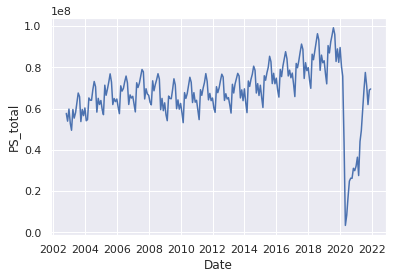

In [75]:
from matplotlib import pyplot as plt
sns.set_theme()
sns.lineplot(x="Date",y="PS_total",data=d)


<AxesSubplot:xlabel='Date', ylabel='PS_total'>

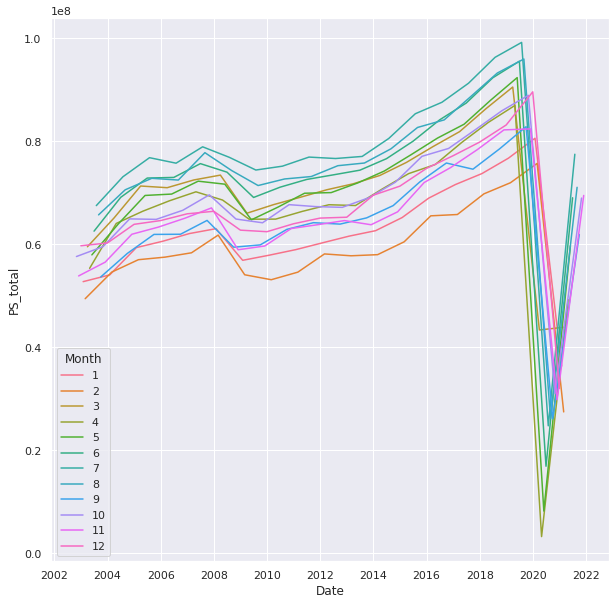

In [76]:
plt.figure(figsize=(10,10))

sns.lineplot(x="Date",y="PS_total",hue="Month",data=d)

<AxesSubplot:xlabel='Date', ylabel='PS_total'>

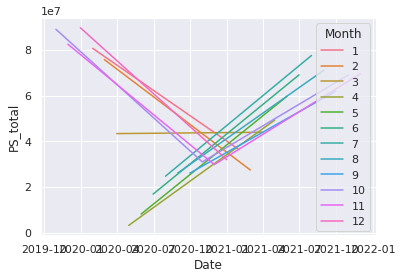

In [81]:
from datetime import datetime
d2 = d[d.Date > datetime(2019, 20, 1)]


sns.lineplot(x="Date",y="PS_total",hue="Month",data=d2)